In [2]:
from sklearn import metrics
from scipy import stats
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
sns.set_theme(style='whitegrid')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.family'] = 'Helvetica'


def format_e(n):
    a = '%2e' % n
    return a.split('e')[0].rstrip('0').rstrip('.') + 'e' + a.split('e')[1]

def mean_confidence_interval(data, confidence=0.95, rounding=4):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m, rounding), round(m-h, rounding), round(m+h, rounding)

def confidence_interval(data, size=10000, func=np.mean):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    np.random.seed(42)
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return np.percentile(bs_replicates, [2.5, 97.5])

metadata_phase1 = pd.read_csv("/home/kti01/Documents/My Files/Projects/Overlap/data/phase1/metadata_phase1.csv")
#metadata_phase1 = metadata_phase1[~metadata_phase1.participant.isin(['e21', 'e41', 'e70', 'e87', 'g71'])]
metadata_phase2 = pd.read_csv("/home/kti01/Documents/My Files/Projects/Overlap/data/phase2/metadata_phase2.csv")
metadata_phase3 = pd.read_csv("/home/kti01/Documents/My Files/Projects/Overlap/data/phase3/metadata_phase3.csv")
metadata_phase1['confidence'] = metadata_phase1['confidence'].apply(lambda x: x if x >= 1 else np.nan)
metadata_phase2 = metadata_phase2[~metadata_phase2.issues.isin(['Insufficient Image Quality', 'unzureichende Bildqualität'])]
metadata_phase3 = metadata_phase3[~metadata_phase3.issues.isin(['Insufficient Image Quality', 'unzureichende Bildqualität'])]
metadata = pd.merge(metadata_phase2, metadata_phase3, how='inner', left_on=['participant', 'mask'], right_on=['participant', 'mask'])

metadata_phase2.sort_values(['participant', 'mask'], inplace=True)
metadata_phase3.sort_values(['participant', 'mask'], inplace=True)

In [3]:
metadata_phase1.groupby('participant').count()

,group,image_id,mask,benign_malignant,prediction,confidence,AI_prediction,language
participant,,,,,,,,
e10,15,15,15,15,15,15,14,15
e12,15,15,15,15,15,15,14,15
e13,15,15,15,15,15,13,14,15
e14,14,14,14,14,14,14,14,14
e19,13,13,13,13,13,10,12,13
e2,15,15,15,15,15,14,14,15
e20,15,15,15,15,15,15,14,15
e21,10,10,10,10,10,10,10,10
e23,15,15,15,15,15,15,14,15


## Accuracy, sensitivity, specificity plots

Accuracy
Phase 2 and 3 Test: Ttest_relResult(statistic=-0.9558458587325042, pvalue=0.34115513561642896)
Phase1:  65.77763215377894 (109, 4)
Phase 1 Test Ttest_relResult(statistic=-5.357964151014257, pvalue=4.801672835474456e-07)
Phase2:  72.30654761904762
Phase3:  73.2199302134647
CI Phase1:  [63.49874399 68.11493829]
CI Phase2:  [70.2107579  74.30213465]
CI Phase3:  [71.03958846 75.31628438]
Change in accuracy:  [-0.94673645  2.78889573]
Increase 52
Decrease 34
Same 30
N = 116


/tmp/ipykernel_1535620/390475559.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(x))+'%' for x in ax.get_yticks()])
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


Sensitivity
Phase 2 and 3 Test: Ttest_relResult(statistic=-2.7578411518295383, pvalue=0.006770116333878024)
Phase1:  58.71559633027523 (109, 4)
Phase 1 Test Ttest_relResult(statistic=-2.995737699965846, pvalue=0.0033960181036468765)
Phase2:  63.86083743842364
Phase3:  67.86330049261083
CI Phase1:  [54.45609436 62.9423329 ]
CI Phase2:  [60.29967159 67.52676006]
CI Phase3:  [64.02901786 71.59305727]
Change in accuracy:  [1.23665846 6.93247126]
Increase 42
Decrease 22
Same 52
N = 116


/tmp/ipykernel_1535620/390475559.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(x))+'%' for x in ax.get_yticks()])


Specificity
Phase 2 and 3 Test: Ttest_relResult(statistic=1.6054678070816342, pvalue=0.11113352762597455)
Phase1:  72.83966797728264 (109, 4)
Phase 1 Test Ttest_relResult(statistic=-4.4984226828324, pvalue=1.73195690434417e-05)
Phase2:  80.7522577996716
Phase3:  78.57655993431857
CI Phase1:  [69.21363041 76.43075579]
CI Phase2:  [77.31373153 83.96975062]
CI Phase3:  [74.82553366 82.09154351]
Change in accuracy:  [-4.79269294  0.48234811]
Increase 23
Decrease 34
Same 59
N = 116


/tmp/ipykernel_1535620/390475559.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(x))+'%' for x in ax.get_yticks()])


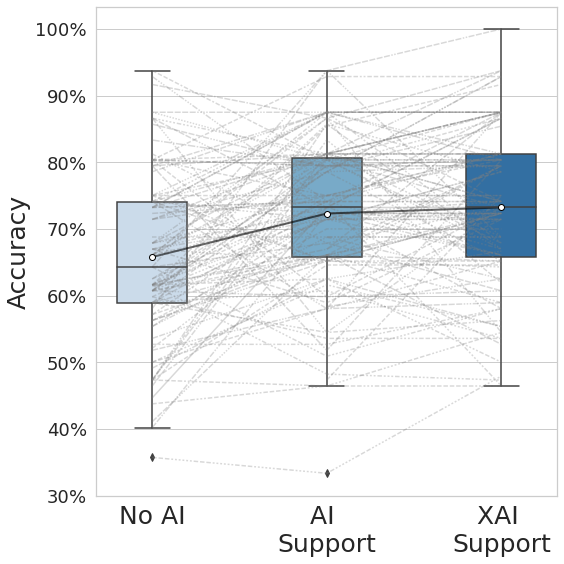

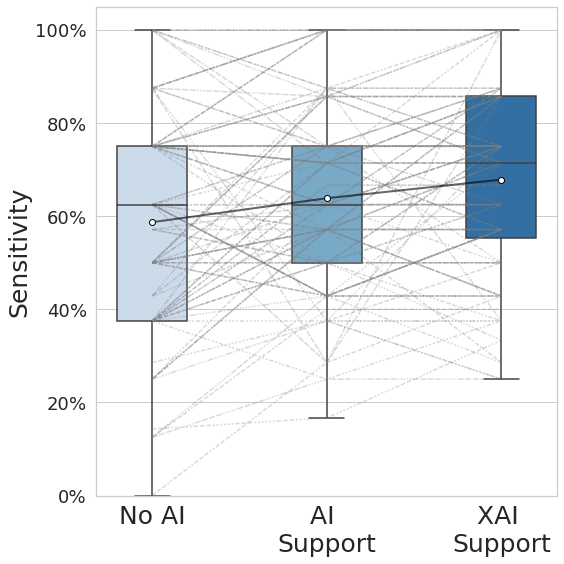

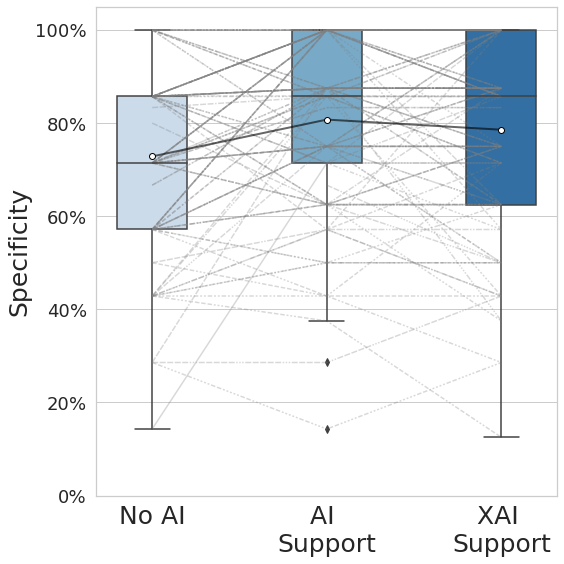

In [4]:
dfs = {}
for metric in ['Accuracy', 'Sensitivity', 'Specificity']:
    print("=========")
    print(metric)
    print("=========")
    if metric == 'Sensitivity':
        phase1_acc = metadata_phase1.groupby('participant').apply(lambda x: metrics.recall_score(x.benign_malignant, np.floor(x.prediction))*100)
        phase2_acc = metadata.groupby('participant').apply(lambda x: metrics.recall_score(x.benign_malignant_x, np.floor(x.prediction_x))*100)
        phase3_acc = metadata.groupby('participant').apply(lambda x: metrics.recall_score(x.benign_malignant_y, np.floor(x.prediction_y))*100)
        accuracy_df = pd.DataFrame({'phase2': phase2_acc, 'phase3': phase3_acc}).reset_index()
        accuracy_df = pd.merge(pd.DataFrame(phase1_acc).rename({0: 'phase1'}, axis=1), accuracy_df,  on='participant', how='right')
    elif metric == 'Specificity':
        phase1_acc = metadata_phase1.groupby('participant').apply(lambda x: metrics.recall_score(x.benign_malignant, np.floor(x.prediction), pos_label=0)*100)
        phase2_acc = metadata.groupby('participant').apply(lambda x: metrics.recall_score(x.benign_malignant_x, np.floor(x.prediction_x), pos_label=0)*100)
        phase3_acc = metadata.groupby('participant').apply(lambda x: metrics.recall_score(x.benign_malignant_y, np.floor(x.prediction_y), pos_label=0)*100)
        accuracy_df = pd.DataFrame({'phase2': phase2_acc, 'phase3': phase3_acc}).reset_index()
        accuracy_df = pd.merge(pd.DataFrame(phase1_acc).rename({0: 'phase1'}, axis=1), accuracy_df,  on='participant', how='right')
    else:
        phase1_acc = metadata_phase1.groupby('participant').apply(lambda x: metrics.balanced_accuracy_score(x.benign_malignant, np.floor(x.prediction))*100)
        phase2_acc = metadata.groupby('participant').apply(lambda x: metrics.balanced_accuracy_score(x.benign_malignant_x, np.floor(x.prediction_x))*100)
        phase3_acc = metadata.groupby('participant').apply(lambda x: metrics.balanced_accuracy_score(x.benign_malignant_y, np.floor(x.prediction_y))*100)
        accuracy_df = pd.DataFrame({'phase2': phase2_acc, 'phase3': phase3_acc}).reset_index()
        accuracy_df = pd.merge(pd.DataFrame(phase1_acc).rename({0: 'phase1'}, axis=1), accuracy_df,  on='participant', how='right')

    print('Phase 2 and 3 Test:', stats.ttest_rel(accuracy_df.phase2, accuracy_df.phase3))
    print('Phase1: ', accuracy_df.phase1.mean(), accuracy_df.dropna().shape)
    print('Phase 1 Test', stats.ttest_rel(accuracy_df.dropna().phase1, accuracy_df.dropna().phase2))
    print('Phase2: ', accuracy_df.phase2.mean())
    print('Phase3: ', accuracy_df.phase3.mean())
    print('CI Phase1: ', confidence_interval(accuracy_df.dropna().phase1))
    print('CI Phase2: ', confidence_interval(accuracy_df.phase2))
    print('CI Phase3: ', confidence_interval(accuracy_df.phase3))


    change_df = accuracy_df.copy()
    change = ((change_df.phase3 - change_df.phase2))
    print('Change in accuracy: ', confidence_interval(change, size=10000))

    print('Increase', accuracy_df[accuracy_df.phase3 > accuracy_df.phase2].shape[0])
    print('Decrease', accuracy_df[accuracy_df.phase3 < accuracy_df.phase2].shape[0])
    print('Same', accuracy_df[accuracy_df.phase3 == accuracy_df.phase2].shape[0])
    print('N =', accuracy_df.shape[0])
    
    df = accuracy_df.copy()#.dropna()
    
    dfs[metric] = df
    fig = plt.figure(figsize=(8,8))
    ax = sns.boxplot(data=df, width=0.4, palette="Blues", showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"6"})
    palette = sns.color_palette(['grey'], len(df))
    sns.lineplot(data=df[['phase1', 'phase2', 'phase3']].T, palette=palette, alpha=0.3)
    sns.lineplot(data=df[['phase1', 'phase2', 'phase3']].mean().T, color='black', alpha=0.6, linewidth=2)
    plt.legend('', frameon=False)
    plt.yticks(size=18)
    if metric in ['Sensitivity', 'Specificity']:
        plt.ylim(0, 105)
    ax.set_yticklabels([str(int(x))+'%' for x in ax.get_yticks()])
    plt.xticks(size=25)
    plt.ylabel(metric, size=25)
    ax.set_xticklabels(["No AI", "AI \nSupport", "XAI \nSupport"])
    fig.tight_layout()
    plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/accuracy/"+metric+".pdf", dpi=500, bbox_inches='tight')


In [6]:
#dfs['Sensitivity'].to_excel('../Source Data/Extended_Data_Tab2_Sensitivity.xlsx', index=True)

In [19]:
#dfs['Accuracy'].to_excel('../Source Data/Fig4a.xlsx', index=True)

In [4]:
df = dfs['Sensitivity'].dropna()
print(stats.ttest_rel(df.phase1, df.phase2))
df = dfs['Specificity'].dropna()
print(stats.ttest_rel(df.phase1, df.phase2))

Ttest_relResult(statistic=-2.995737699965846, pvalue=0.0033960181036468765)
Ttest_relResult(statistic=-4.4984226828324, pvalue=1.73195690434417e-05)


In [5]:
df = dfs['Accuracy'].dropna()
print(stats.ttest_rel(df.phase1, df.phase2))
print(df.phase1.mean(), confidence_interval(df.phase1))
print(df.shape)

Ttest_relResult(statistic=-5.357964151014257, pvalue=4.801672835474456e-07)
65.77763215377895 [63.49874399 68.11493829]
(109, 4)


In [6]:
print(df[df.phase2 > df.phase1].shape)
print(df[df.phase2 < df.phase1].shape)
print(df[df.phase2 == df.phase1].shape)

(76, 4)
(29, 4)
(4, 4)


## Confidence & Trust

In [5]:
meta = metadata.copy()
meta = meta[meta['prediction_y'].isin([0, 0.5, 1])]
#meta = meta[meta.prediction_x == meta.prediction_y]

confidence_df = meta[['participant', 'confidence_x', 'confidence_y']].copy()
trust_df = meta[['participant', 'trust_x', 'trust_y', 'prediction_x', 'prediction_y', 'mask', 'AI_prediction_y']].copy()
#trust_df = trust_df[trust_df.prediction_y.isin([0, 0.5])]
confidence_df.rename({'confidence_x': 'phase2', 'confidence_y': 'phase3'}, axis=1, inplace=True)
trust_df.rename({'trust_x': 'phase2', 'trust_y': 'phase3'}, axis=1, inplace=True)

print('==== Confidence ====')
print('N =', confidence_df.shape[0])
print('Confidence', stats.ttest_rel(confidence_df['phase2'], confidence_df['phase3']))

change_df = confidence_df.copy()
change = ((change_df['phase3'] - change_df['phase2'])/change_df['phase2'])
print('Mean change in confidence: ', change.mean())
print('Mean change in confidence: ', confidence_interval(change))

confidence_mean = confidence_df.groupby('participant').mean()
print('Increase', confidence_mean[confidence_mean['phase3'] > confidence_mean['phase2']].shape[0])
print('Decrease', confidence_mean[confidence_mean['phase3'] < confidence_mean['phase2']].shape[0])
print('Same', confidence_mean[confidence_mean['phase3'] == confidence_mean['phase2']].shape[0])
print('N =', confidence_df.shape[0])
print()

print('==== Trust ====')
print('Trust', stats.ttest_rel(trust_df['phase2'], trust_df['phase3']))
print('N =', trust_df.shape[0])
change_df = trust_df.copy()
change = ((change_df['phase3'] - change_df['phase2'])/change_df['phase2'])
print('Mean change in trust: ', change.mean())
print('Change in trust: ', confidence_interval(change))

trust_mean = trust_df.groupby('participant').mean()
print('Increase', trust_mean[trust_mean['phase3'] > trust_mean['phase2']].shape[0])
print('Decrease', trust_mean[trust_mean['phase3'] < trust_mean['phase2']].shape[0])
print('Same', trust_mean[trust_mean['phase3'] == trust_mean['phase2']].shape[0])
print('N =', trust_df.shape[0])

==== Confidence ====
N = 1714
Confidence Ttest_relResult(statistic=-6.747691523470554, pvalue=2.0486755237814364e-11)
Mean change in confidence:  0.12253037543294253
Mean change in confidence:  [0.09057947 0.15742746]
Increase 69
Decrease 40
Same 7
N = 1714

==== Trust ====
Trust Ttest_relResult(statistic=-4.602180666187127, pvalue=4.4884198084560425e-06)
N = 1714
Mean change in trust:  0.1751657683688022
Change in trust:  [0.13736839 0.21597545]
Increase 71
Decrease 39
Same 6
N = 1714


In [6]:
confidence_df[['participant', 'phase2', 'phase3']].to_excel('../Source Data/Fig4b.xlsx', index=False)
trust_df[['participant', 'phase2', 'phase3']].to_excel('../Source Data/Fig4c.xlsx', index=False)

confidence_phase1 = metadata_phase1[['participant', 'confidence']].rename({'confidence': 'phase1'}, axis=1).dropna()
#confidence_phase1.to_excel('../Source Data/Fig4b_Phase1.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

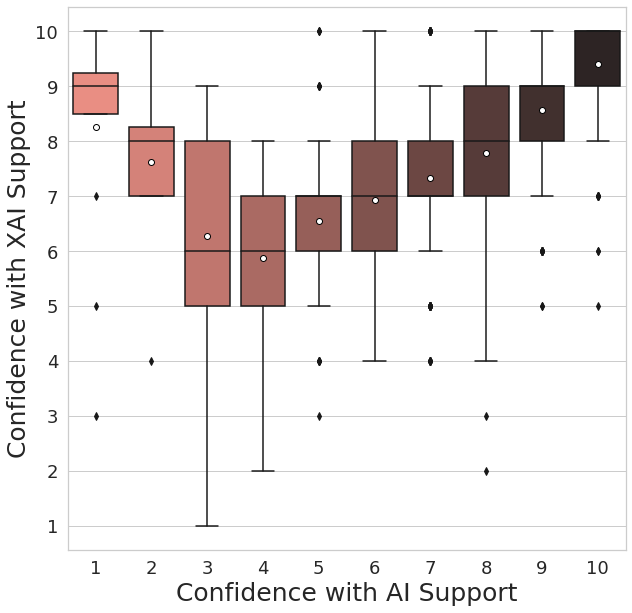

In [11]:
ax = sns.boxplot(data=confidence_df, x='phase2', y='phase3', palette='dark:salmon_r', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"6"})
plt.yticks(range(1, 11), size=18)
plt.xticks(size=18)
plt.ylabel('Confidence with XAI Support', size=25)
plt.xlabel('Confidence with AI Support', size=25)
fig.tight_layout()
#plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/confidence/boxplot", dpi=500, bbox_inches='tight')
#confidence_df.to_csv('../Source Data/Extended_Data_Fig4b.csv', index=False)

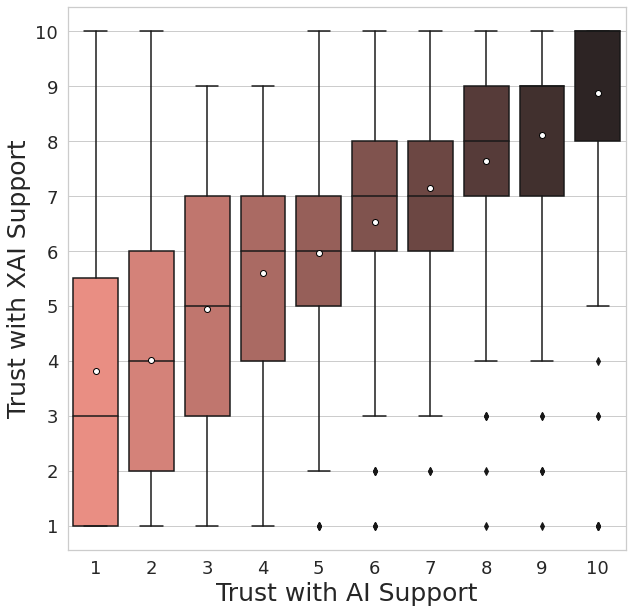

In [15]:
ax = sns.boxplot(data=trust_df, x='phase2', y='phase3', palette='dark:salmon_r', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"6"})
plt.yticks(range(1, 11), size=18)
plt.xticks(size=18)
plt.ylabel('Trust with XAI Support', size=25)
plt.xlabel('Trust with AI Support', size=25)
fig.tight_layout()
#plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/trust/boxplot", dpi=500, bbox_inches='tight')
#trust_df[['participant', 'phase2', 'phase3']].to_csv('../Source Data/Extended_Data_Fig4d.csv', index=False)

In [16]:
low_conf = metadata[metadata.confidence_x <= 5]
low_conf[low_conf.prediction_x != low_conf.prediction_y].shape[0] / low_conf.shape[0]

0.41450777202072536

In [17]:
right1 = df[np.floor(df.prediction) == df.benign_malignant_x].confidence.dropna()
wrong1 = df[np.floor(df.prediction) != df.benign_malignant_x].confidence.dropna()

right2 = df[np.floor(df.prediction_x) == df.benign_malignant_x].confidence_x
wrong2 = df[np.floor(df.prediction_x) != df.benign_malignant_x].confidence_x

right3 = df[np.floor(df.prediction_y) == df.benign_malignant_y].confidence_y
wrong3 = df[np.floor(df.prediction_y) != df.benign_malignant_y].confidence_y

AttributeError: 'DataFrame' object has no attribute 'prediction'

In [18]:
stats.ttest_ind(right2, right3)

NameError: name 'right2' is not defined

In [19]:
stats.ttest_ind(wrong2, wrong3)

NameError: name 'wrong2' is not defined

In [20]:
np.unique(metadata_phase1.groupby('participant').mean().index.values).shape

(113,)

In [21]:
p1 = metadata_phase1.groupby('participant').confidence.mean().dropna()
print('Phase1', p1.mean(), confidence_interval(p1))
print('Phase2', confidence_df.phase2.mean(), confidence_interval(confidence_df.phase2))
print('Phase3', confidence_df.phase3.mean(), confidence_interval(confidence_df.phase3))

Phase1 6.657311757311758 [6.41749745 6.89300956]
Phase2 7.519253208868145 [7.43348891 7.60443407]
Phase3 7.784714119019837 [7.71236873 7.85824096]


In [22]:
print('Phase2', trust_df.phase2.mean(), confidence_interval(trust_df.phase2))
print('Phase3', trust_df.phase3.mean(), confidence_interval(trust_df.phase3))

Phase2 6.717036172695449 [6.60792007 6.82963827]
Phase3 6.955075845974329 [6.84480747 7.06359393]


/tmp/ipykernel_1599394/1216189953.py:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = df[['confidence', 'confidence_x', 'confidence_y']].melt(var_name='phase', value_name='confidence')


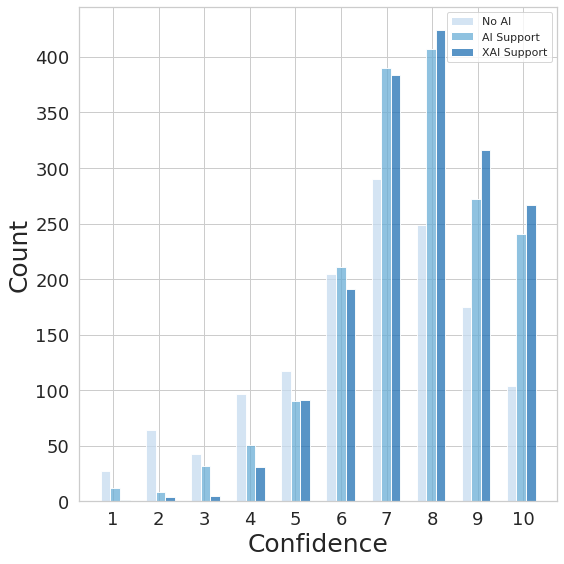

In [24]:
palette = {
    'No AI': '#c6dbef',
    'AI Support': '#6aaed6',
    'XAI Support': '#2070b4'
}

df = pd.merge(metadata_phase1, metadata, how='right', left_on=['participant', 'mask'], right_on=['participant', 'mask']).drop_duplicates()
df = df[['confidence', 'confidence_x', 'confidence_y']].melt(var_name='phase', value_name='confidence')
df['phase'] = df['phase'].map({'confidence': 'No AI', 'confidence_x': 'AI Support', 'confidence_y': 'XAI Support'})
df.rename({'phase': ''}, axis=1, inplace=True)
df = df.dropna()
#print(df.phase.value_counts())
fig = plt.figure(figsize=(8,8))
ax = sns.histplot(df, x="confidence", hue="", multiple="dodge", palette=palette, shrink=7, bins=100)
plt.xticks(range(1, 11))
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('Confidence', size=25)
plt.ylabel('Count', size=25)
#plt.legend(title='', loc='upper left', labels=['No AI', 'AI Support', 'XAI Support'], fontsize=15)
fig.tight_layout()
#plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/confidence/confidence_histplot", dpi=500, bbox_inches='tight')
#df.to_csv('../Source Data/Extended_Data_Fig4a.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


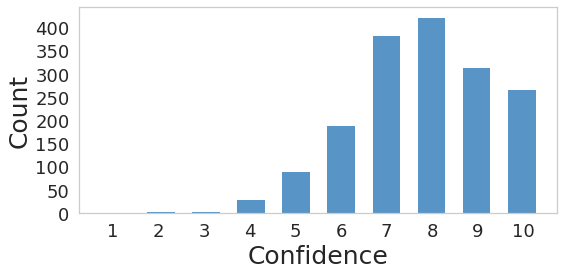

In [24]:
palette = {
    'No AI': '#c6dbef',
    'AI Support': '#6aaed6',
    'XAI Support': '#2070b4'
}

df = pd.merge(metadata_phase1, metadata, how='right', left_on=['participant', 'mask'], right_on=['participant', 'mask']).drop_duplicates()
df = df[['confidence_y']].melt(var_name='phase', value_name='confidence')
df['phase'] = df['phase'].map({'confidence': 'No AI', 'confidence_x': 'AI Support', 'confidence_y': 'XAI Support'})
df.rename({'phase': ''}, axis=1, inplace=True)
df = df.dropna()
#print(df.phase.value_counts())
fig = plt.figure(figsize=(8,4))
ax = sns.histplot(df, x="confidence", hue="", multiple="dodge", palette=palette, shrink=7, bins=100)
plt.xticks(range(1, 11))
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('Confidence', size=25)
plt.ylabel('Count', size=25)
plt.grid(False)
ax.legend().set_visible(False)
#plt.legend(title='', loc='upper left', labels=['No AI', 'AI Support', 'XAI Support'], fontsize=15)
fig.tight_layout()
plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/confidence/confidence_histplot_phase3", dpi=500, bbox_inches='tight')

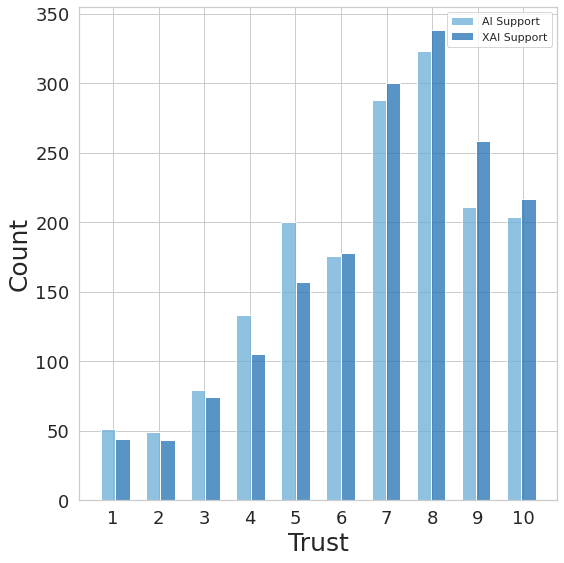

In [29]:
palette = {
    'No AI': '#c6dbef',
    'AI Support': '#6aaed6',
    'XAI Support': '#2070b4'
}

df = metadata[['trust_x', 'trust_y']].melt(var_name='phase', value_name='trust')
df['phase'] = df['phase'].map({'trust_x': 'AI Support', 'trust_y': 'XAI Support'})
df.rename({'phase': ''}, axis=1, inplace=True)
df = df.dropna()
#print(df.phase.value_counts())
fig = plt.figure(figsize=(8,8))
ax = sns.histplot(df, x="trust", hue='', multiple="dodge", palette=palette, shrink=7, bins=100)
plt.xticks(range(1, 11))
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('Trust', size=25)
plt.ylabel('Count', size=25)
fig.tight_layout()
#plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/trust/trust_histplot", dpi=500, bbox_inches='tight')
#df.to_csv('../Source Data/Extended_Data_Fig4c.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


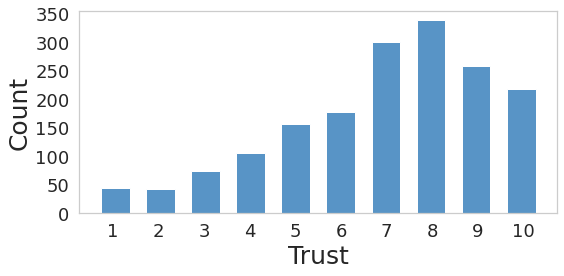

In [28]:
palette = {
    'No AI': '#c6dbef',
    'AI Support': '#6aaed6',
    'XAI Support': '#2070b4'
}

df = metadata[['trust_y']].melt(var_name='phase', value_name='trust')
df['phase'] = df['phase'].map({'trust_x': 'AI Support', 'trust_y': 'XAI Support'})
df.rename({'phase': ''}, axis=1, inplace=True)
df = df.dropna()
#print(df.phase.value_counts())
fig = plt.figure(figsize=(8,4))
ax = sns.histplot(df, x="trust", hue='', multiple="dodge", palette=palette, shrink=7, bins=100)
plt.xticks(range(1, 11))
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('Trust', size=25)
plt.ylabel('Count', size=25)
plt.grid(False)
ax.legend().set_visible(False)
fig.tight_layout()
plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/trust/trust_histplot_phase3", dpi=500, bbox_inches='tight')

## Trust agree vs disagree

In [10]:
trust_df['prediction_x'] = np.floor(trust_df['prediction_x'])
trust_df['prediction_y'] = np.floor(trust_df['prediction_y'])
"""AGREE VS DISAGREE (ALL IMAGES)"""
target = [0, 1]
agree = trust_df[(trust_df.prediction_y.isin(target))  & (trust_df.prediction_y == trust_df.AI_prediction_y)].phase3
disagree = trust_df[(trust_df.prediction_y.isin(target))  & (trust_df.prediction_y != trust_df.AI_prediction_y)].phase3
agree2 = trust_df[(trust_df.prediction_x.isin(target))  & (trust_df.prediction_x == trust_df.AI_prediction_y)].phase3
disagree2 = trust_df[(trust_df.prediction_x.isin(target))  & (trust_df.prediction_x != trust_df.AI_prediction_y)].phase3
stats.ttest_ind(agree2, disagree2)

agree = list(agree)
agree.extend(agree2)
disagree = list(disagree)
disagree.extend(disagree2)
print(stats.ttest_ind(agree, disagree))
print(len(agree))
print(len(disagree))
print(np.mean(agree))
print(np.mean(disagree))
print(confidence_interval(agree))
print(confidence_interval(disagree))

Ttest_indResult(statistic=33.52331741006486, pvalue=2.4300152879441087e-213)
2684
744
7.551788375558868
4.80241935483871
[7.47801788 7.62295082]
[4.6438172  4.95967742]


## Plots

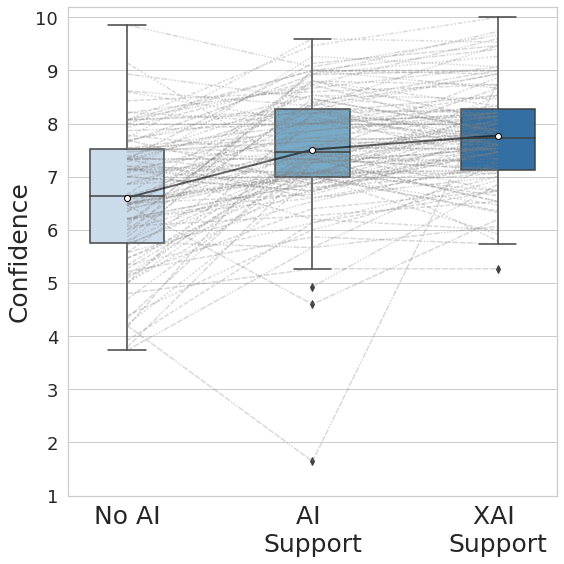

In [8]:
phase1_conf = metadata_phase1.groupby('participant').confidence.mean()
df = pd.merge(pd.DataFrame(phase1_conf).rename({'confidence': 'phase1'}, axis=1), confidence_mean,  left_index=True, right_index=True, how='right')
#df = df[df.phase1 >= 1]

fig = plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df, width=0.4, palette="Blues", showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"6"})
palette = sns.color_palette(['grey'], len(df))
#sns.stripplot(data=df, jitter=True, color='black', alpha=0.6)
sns.lineplot(data=df.T, palette=palette, alpha=0.3)
sns.lineplot(data=df.mean().T, color='black', alpha=0.6, linewidth=2)
plt.legend('', frameon=False)
plt.yticks(size=18)
plt.xticks(size=25)
plt.ylabel('Confidence', size=25)
plt.yticks(range(1, 11, 1))
plt.ylim(1, 10.2)
ax.set_xticklabels(["No AI", "AI \nSupport", "XAI \nSupport"])
fig.tight_layout()
plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/confidence/confidence_boxplot.pdf", dpi=500, bbox_inches='tight')

In [11]:
confidence_mean_change = confidence_mean.phase3 - confidence_mean.phase2
stats.ttest_1samp(confidence_mean_change, popmean=0.0)

Ttest_1sampResult(statistic=3.1493617154539377, pvalue=0.0020853261115490315)

In [12]:
confidence_df.std()

phase2    1.771518
phase3    1.544355
dtype: float64

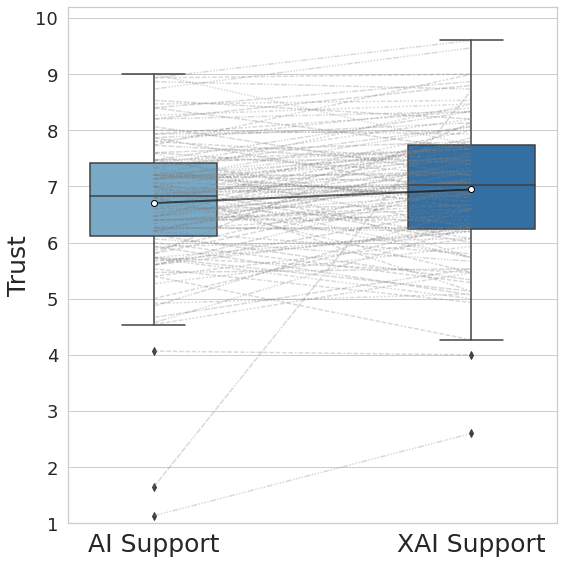

In [24]:
trust_mean = trust_mean[['phase2', 'phase3']]

phase1_conf = metadata_phase1.groupby('participant').confidence.mean()
df = pd.merge(pd.DataFrame(phase1_conf).rename({'confidence': 'phase1'}, axis=1), trust_mean,  left_index=True, right_index=True, how='right')
df['phase1'] = np.nan

fig = plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df, width=0.4, palette='Blues', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"6"})
palette = sns.color_palette(['grey'], len(trust_mean))
sns.lineplot(data=df.T, palette=palette, alpha=0.3)
sns.lineplot(data=df.mean().T, color='black', alpha=0.6, linewidth=2)
plt.legend('', frameon=False)
plt.yticks(size=18)
plt.xticks(size=25)
plt.ylabel('Trust', size=25)
plt.yticks(range(1, 11, 1))
plt.ylim(1, 10.2)
ax.set_xticklabels(["", "AI Support", "XAI Support"])
fig.tight_layout()
plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/trust/trust_boxplot.pdf", dpi=500, bbox_inches='tight')

In [14]:
print(stats.ttest_rel(trust_mean.phase2, trust_mean.phase3))
print(trust_mean.phase2.mean(), confidence_interval(trust_mean.phase2))
print(trust_mean.phase3.mean(), confidence_interval(trust_mean.phase3))
print(trust_mean.shape)

Ttest_relResult(statistic=-2.6045103485130343, pvalue=0.010415082652171736)
6.703070923329545 [6.47389822 6.92510606]
6.945801755715549 [6.73299194 7.16219867]
(116, 2)



### Participant Metadata

In [10]:
accuracy_df = dfs['Accuracy']

merging_df = accuracy_df
attribute = 'experience_in_dermoscopy'

participant_metadata = pd.read_csv("/home/kti01/Documents/My Files/Projects/Overlap/data/participant_metadata.csv")
merged = pd.merge(merging_df, participant_metadata[['participant', 'experience_in_dermoscopy', 'years_as_dermatologist', 'years_using_dermoscopy']], on='participant', how='left')
merged['change'] = merged.phase3 - merged.phase2

experience_map = {'Basic education, rare use': 0, 'Occasional use': 1, 'Regular use': 2,
                 'Regular use and education': 3, 
                  'Regular scientific discussion': 4}

rename_map = {'Basic education received, but rare use': 'Basic education, rare use', 'Occasional use': 'Occasional use',
              'Regular use': 'Regular use', 'Regular use and education': 'Regular use and education', 
              'Regular scientific discussion (papers, conferences, teaching, etc.).':  'Regular scientific discussion'}

#display(merged.groupby(attribute).count())
df = merged.reset_index() #merged.groupby(attribute).mean().reset_index()
df['n'] = df.groupby('experience_in_dermoscopy').count().participant
df[attribute] = df[attribute].replace(rename_map)

df['order'] = df[attribute].apply(lambda x: experience_map[x])
df = df.sort_values('order', ascending=True)

In [11]:
countries = ['Germany',
'Switzerland',
'Austria',
'Turkey',
'North Macedonia',
'Latvia',
'Greece',
'Argentina',
'Belgium',
'Serbia',
'Bulgaria',
'Finland',
'Sweden',
'Costa Rica',
'Australia',
'Brazil',
'USA',
'Egypt',
'Chile',
'Hungary',
'Ukraine',
'Mexico',
'Venezuela',
'Nigeria',
'Spain',
'Croatia',
'Netherlands',
'Poland',
'Italy',
'Qatar',
'Georgia',
'Ireland',
'Lebanon']
pd.DataFrame(countries).sort_values(0).shape

(33, 1)

/tmp/ipykernel_1535620/3233128857.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(x))+'%' for x in ax.get_yticks()])


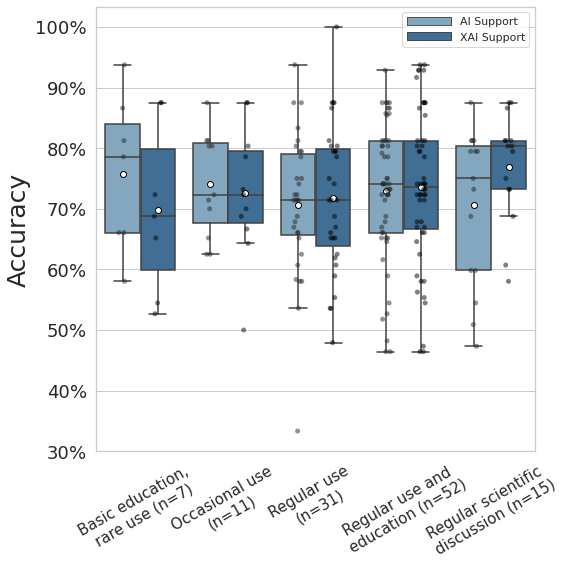

In [17]:
x = df[['phase2', 'experience_in_dermoscopy']].rename({'phase2': 'Accuracy'}, axis=1)
y = df[['phase3', 'experience_in_dermoscopy']].rename({'phase3': 'Accuracy'}, axis=1)
x['phase'] = 'AI Support'
y['phase'] = 'XAI Support'
df_ = pd.concat([x, y], axis=0)
df_['order'] = df_['experience_in_dermoscopy'].apply(lambda x: experience_map[x])
df_ = df_.sort_values('order', ascending=True)
fig = plt.figure(figsize=(8,8))

#ax = sns.barplot(data=df_, y='experience_in_dermoscopy', x='Accuracy', hue='phase', orient='h', palette='Blues')

palette = {
    'AI Support': '#78aac8',
    'XAI Support': '#336fa2'
}
#ax = sns.pointplot(dodge=0.2,
#    data=df_, y="Accuracy", x='experience_in_dermoscopy', hue='phase',
#    errorbar=("ci", 95), capsize=.4, join=False, palette=palette, n_boot=10000, seed=42
#)

ax = sns.boxplot(data=df_, y="Accuracy", x='experience_in_dermoscopy', hue='phase', 
                 palette=palette, showfliers=False, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"6"})
sns.stripplot(data=df_, y="Accuracy", x="experience_in_dermoscopy",
              hue="phase", dodge=True, ax=ax, color='black', alpha=0.5)
#plt.xlim(60, 85)
plt.xticks(size=18)
labels = ['Basic education, \nrare use (n=7)', 'Occasional use \n(n=11)', 'Regular use \n(n=31)',
          'Regular use and \neducation (n=52)', 'Regular scientific \ndiscussion (n=15)']
ax.set_yticklabels([str(int(x))+'%' for x in ax.get_yticks()])

ax.set_xticklabels(labels, size=15, rotation=30)
plt.xlabel('')
plt.yticks(size=18)
plt.ylabel('Accuracy', size=25)
plt.xlabel('')
#plt.legend(fontsize=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[0]), (handles[1], handles[1])],
          labels=['AI Support', 'XAI Support'],handlelength=4)
plt.tight_layout()
plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/accuracy/accuracy_by_experience", dpi=500, bbox_inches='tight')

In [16]:
#df_[['Accuracy', 'experience_in_dermoscopy', 'phase']].to_excel('../Source Data/Fig4d.xlsx', index=False)

In [87]:
df_.groupby('experience_in_dermoscopy').mean()

,Accuracy,order
experience_in_dermoscopy,,
"Basic education, rare use",72.767857,0.0
Occasional use,73.354978,1.0
Regular scientific discussion,73.779762,4.0
Regular use,71.198157,2.0
Regular use and education,73.277244,3.0


In [88]:
def confidence_interval_correlation(data, size=10000, attribute='order'):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    np.random.seed(42)
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = data.sample(data.shape[0], replace=True)
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = stats.spearmanr(bs_sample[attribute], bs_sample['change'])[0]
    
    return np.percentile(bs_replicates, [2.5, 97.5])

print(stats.spearmanr(df.order, df.change))
print(confidence_interval_correlation(df))

SpearmanrResult(correlation=0.19725977157838998, pvalue=0.03380031460230198)
[0.01552474 0.3723704 ]


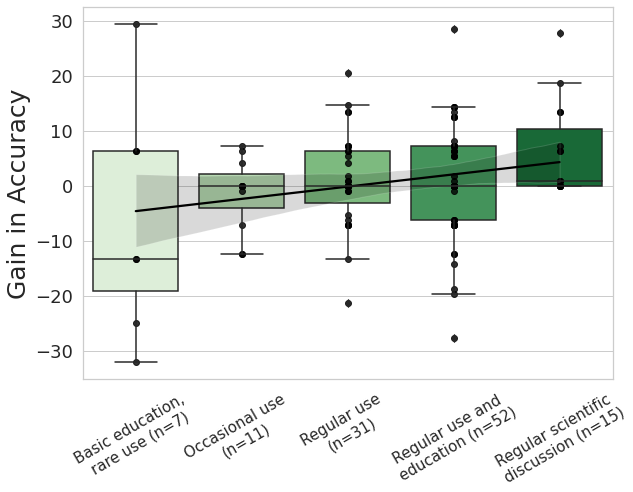

In [89]:
x = df[['phase2', 'experience_in_dermoscopy']].rename({'phase2': 'Accuracy'}, axis=1)
y = df[['phase3', 'experience_in_dermoscopy']].rename({'phase3': 'Accuracy'}, axis=1)
x['phase'] = 'AI Support'
y['phase'] = 'XAI Support'
df_ = pd.concat([x, y], axis=0)
df_['order'] = df_['experience_in_dermoscopy'].apply(lambda x: experience_map[x])
df_ = df_.sort_values('order', ascending=True)
fig = plt.figure(figsize=(9,7))

ax = sns.boxplot(dodge=0.2, data=df, y="change", x='experience_in_dermoscopy', palette='Greens')
#sns.stripplot(data=df, y='change', x='experience_in_dermoscopy', color='black')
sns.regplot(x="order", y="change", data=df, ax=ax, scatter=True, color='black')
labels = ['Basic education, \nrare use (n=7)', 'Occasional use \n(n=11)', 'Regular use \n(n=31)',
          'Regular use and \neducation (n=52)', 'Regular scientific \ndiscussion (n=15)']
ax.set_xticklabels(labels, size=15, rotation=30)
plt.xlabel('')
plt.yticks(size=18)
plt.ylabel('Gain in Accuracy', size=25)
plt.tight_layout()
plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/accuracy/accuracy_experience_correlation", dpi=500, bbox_inches='tight')

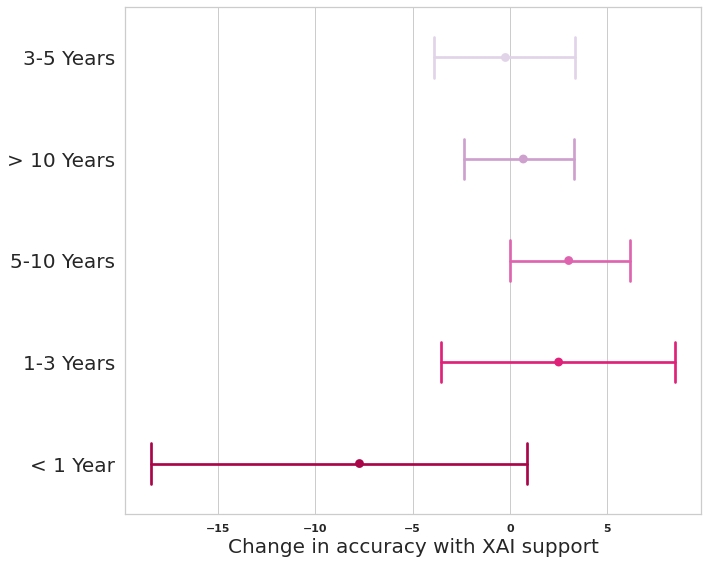

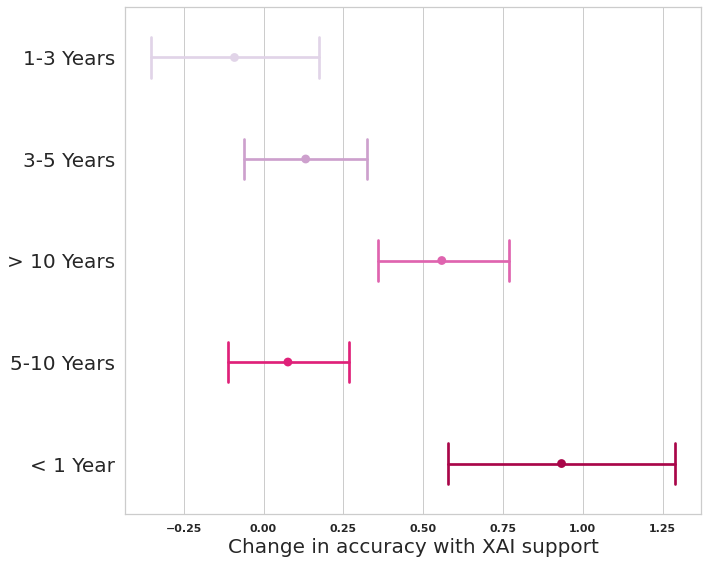

In [94]:
merging_df = accuracy_df
attribute = 'years_using_dermoscopy'

participant_metadata = pd.read_csv("/home/kti01/Documents/My Files/Projects/Overlap/data/participant_metadata.csv")
merged = pd.merge(merging_df, participant_metadata[['participant', 'experience_in_dermoscopy', 'years_as_dermatologist', 'years_using_dermoscopy', 'country']], on='participant')
merged['change'] = merged.phase3 - merged.phase2

experience_map = {'Basic education received, but rare use': 0, 'Occasional use': 1, 'Regular use': 2,
                 'Regular use and education': 3, 
                  'Regular scientific discussion (papers, conferences, teaching, etc.).': 4}

rename_map = {'Basic education received, but rare use': 'Basic education, rare use', 'Occasional use': 'Occasional use',
              'Regular use': 'Regular use', 'Regular use and education': 'Regular use and education', 
              'Regular scientific discussion (papers, conferences, teaching, etc.).':  'Regular scientific discussion'}

#display(merged.groupby(attribute).count())
df = merged.reset_index() #merged.groupby(attribute).mean().reset_index()
df['change'] = df.phase3 - df.phase2
#df['order'] = df[attribute].apply(lambda x: experience_map[x])
#df[attribute] = df[attribute].replace(rename_map)
#df = df.sort_values('order', ascending=True)
fig = plt.figure(figsize=(10,8))
sns.pointplot(
    data=df, x="change", y=attribute,
    errorbar=("ci", 95), capsize=.4, join=False, palette='PuRd', n_boot=10000, seed=42
)
plt.xticks(weight = 'bold')
plt.yticks(size=20)
plt.xlabel('Change in accuracy with XAI support', size=20)
plt.ylabel('')
plt.tight_layout()



merging_df = trust_df
attribute = 'years_using_dermoscopy'

participant_metadata = pd.read_csv("/home/kti01/Documents/My Files/Projects/Overlap/data/participant_metadata.csv")
merged = pd.merge(merging_df, participant_metadata[['participant', 'experience_in_dermoscopy', 'years_as_dermatologist', 'years_using_dermoscopy', 'country']], on='participant')
merged['change'] = merged.phase3 - merged.phase2

experience_map = {'Basic education received, but rare use': 0, 'Occasional use': 1, 'Regular use': 2,
                 'Regular use and education': 3, 
                  'Regular scientific discussion (papers, conferences, teaching, etc.).': 4}

rename_map = {'Basic education received, but rare use': 'Basic education, rare use', 'Occasional use': 'Occasional use',
              'Regular use': 'Regular use', 'Regular use and education': 'Regular use and education', 
              'Regular scientific discussion (papers, conferences, teaching, etc.).':  'Regular scientific discussion'}

#display(merged.groupby(attribute).count())
df = merged.reset_index() #merged.groupby(attribute).mean().reset_index()
df['change'] = df.phase3 - df.phase2
#df['order'] = df[attribute].apply(lambda x: experience_map[x])
#df[attribute] = df[attribute].replace(rename_map)
#df = df.sort_values('order', ascending=True)
fig = plt.figure(figsize=(10,8))
sns.pointplot(
    data=df, x="change", y=attribute,
    errorbar=("ci", 95), capsize=.4, join=False, palette='PuRd', n_boot=10000, seed=42
)
plt.xticks(weight = 'bold')
plt.yticks(size=20)
plt.xlabel('Change in accuracy with XAI support', size=20)
plt.ylabel('')
plt.tight_layout()

In [287]:
pd.read_csv("/home/kti01/Documents/My Files/Projects/Overlap/data/participant_metadata.csv").position.value_counts()

Specialist                   35
Oberarzt                     29
Assistenzarzt                22
Resident                     10
Facharzt                     10
Senior physician              5
Dermatologist                 1
Klinikleiter                  1
Clinical Nurse Consultant     1
Chefärztin                    1
Name: position, dtype: int64